# Shopify Winter 2021 Data Science Intern Challenge

## Question 1

In [1]:
import pandas as pd

In [2]:
# Load CSV
shoes_df = pd.read_csv('sheet1.csv')
shoes_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [12]:
# Calculate average order amount
average_order_value = shoes_df['order_amount'].mean()
average_order_value

3145.128

In [28]:
# Get summary/spread of order_amount column
shoes_df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

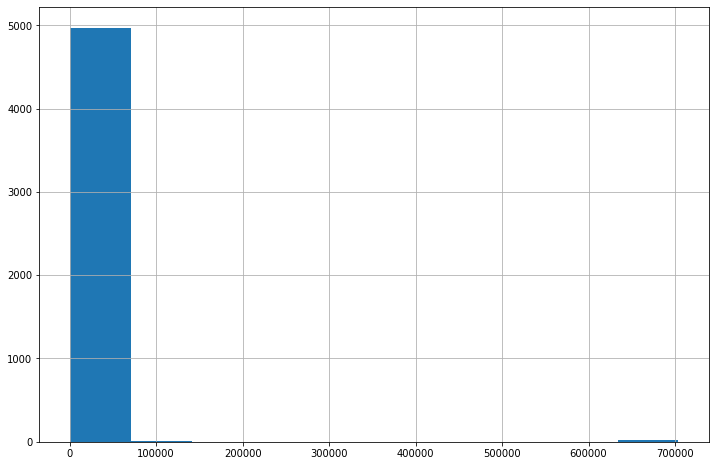

In [26]:
# Create histogram to observe distribution of order_amount column
graph = shoes_df['order_amount'].hist(figsize=(12,8))

In [13]:
# Calculate median order amount
median_order_value = shoes_df['order_amount'].median()
median_order_value

284.0

### As we can see, the average order value seems to be significantly higher than what we would think by looking at the data and just from domain knowledge of sneaker prices in general. From the summary of order amounts, we see that 75% of the order amounts fall at or below 390 dollars. By taking a look at a histogram of the order amounts, we can see that there are a few major outliers skewing the data. Because outliers can play a big role in affecting the mean of our data, it is a better idea to use the <i>median</i> as a metric as it is less prone to outliers. In this case, the median order amount is 284 dollars.

## Question 2

### a. How many orders were shipped by Speedy Express in total?

SELECT COUNT(OrderID) FROM Orders WHERE ShipperID = 1

or...

SELECT COUNT(OrderID) FROM Orders JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID WHERE ShipperName = 'Speedy Express'

#### Answer: 54

### b. What is the last name of the employee with the most orders?

SELECT LastName FROM Employees JOIN Orders on Employees.EmployeeID = Orders.EmployeeID GROUP BY Orders.EmployeeID ORDER BY COUNT(OrderID) DESC LIMIT 1

#### Answer: Peacock

### c. What product was ordered the most by customers in Germany?

SELECT ProductName FROM Products JOIN OrderDetails ON Products.ProductID = OrderDetails.ProductID JOIN Orders ON OrderDetails.OrderID = Orders.OrderID JOIN Customers on Orders.CustomerID = Customers.CustomerID WHERE Customers.Country = 'Germany' GROUP BY OrderDetails.ProductID ORDER BY SUM(Quantity) DESC LIMIT 1

#### Answer: Boston Crab Meat